In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import statistics


import matplotlib.pyplot as plt
%matplotlib inline

# About the Data

This section:
1) Reads in the data
2) Explains the data

In [2]:
df = pd.read_csv('homicide.csv', index_col=0)

In this subsection I format some date variables that will be used for our analysis.


In [3]:
df['date'] = pd.to_datetime(df['date'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10261 entries, 0 to 10260
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Gender                          10261 non-null  object        
 1   Victim_Race                     10261 non-null  object        
 2   Victim_Age                      10261 non-null  object        
 3   Incident_Month                  10261 non-null  float64       
 4   Inc_YR                          10261 non-null  float64       
 5   Week_day                        10261 non-null  object        
 6   Precipitating_event             10261 non-null  object        
 7   Victim_Offender_Relationship_1  10261 non-null  object        
 8   date                            10261 non-null  datetime64[ns]
 9   County                          10261 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 881.8+ KB


In [5]:
df.head()

,Gender,Victim_Race,Victim_Age,Incident_Month,Inc_YR,Week_day,Precipitating_event,Victim_Offender_Relationship_1,date,County
0,Female,Hispanic,19,2.0,2018.0,Monday,All instances where facts provided do not perm...,Other known to Victim,2018-02-12,Alameda County
1,Male,Unkown,38,3.0,2018.0,Sunday,All instances where facts provided do not perm...,Unable to determine relationship,2018-03-18,Alameda County
2,Male,Hispanic,34,6.0,2018.0,Thursday,All instances where facts provided do not perm...,Other known to Victim,2018-06-07,Alameda County
3,Male,White,22,8.0,2018.0,Thursday,All instances where facts provided do not perm...,Unable to determine relationship,2018-08-09,Alameda County
4,Male,Hispanic,26,9.0,2018.0,Sunday,All instances where facts provided do not perm...,Unable to determine relationship,2018-09-09,Alameda County


In [6]:
df['Year'] = df['date'].dt.year 
df['Month'] = df['date'].dt.month 

In [7]:
df['Month_Year'] = df['date'].apply(lambda x: x.strftime('%B-%Y'))

In [8]:
df.groupby('Inc_YR').size()

Inc_YR
2018.0    1764
2019.0    1685
2020.0    2207
2021.0    2379
2022.0    2226
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10261 entries, 0 to 10260
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Gender                          10261 non-null  object        
 1   Victim_Race                     10261 non-null  object        
 2   Victim_Age                      10261 non-null  object        
 3   Incident_Month                  10261 non-null  float64       
 4   Inc_YR                          10261 non-null  float64       
 5   Week_day                        10261 non-null  object        
 6   Precipitating_event             10261 non-null  object        
 7   Victim_Offender_Relationship_1  10261 non-null  object        
 8   date                            10261 non-null  datetime64[ns]
 9   County                          10261 non-null  object        
 10  Year                            10261 non-null  int64         
 11  Mo

# Explanation of Data

The above dataframe "df" reflects the data contained from the csv file 'homicide.csv', which is a subset of the 'HomicideActuals1987-2022.csv' file that was downloaded from the State of California OpenJustice portal at https://openjustice.doj.ca.gov/data on August 23, 2023 under the "Homicide" subsection. For our analysis, "df" contains data from 2018 to 2022 only, and only a selected subset of variables. Additionally, some variables were renamed for the purposes of this analysis. Lastly, missing values, duplicates, and data types were manipulated when creating the subset 'homicide.csv' file, and further manipulation will be conducted bellow in this analysis. 

## Variable Changes (Code used)

Some manipulations include:
    
    Duplicate observations were dropped on master file as
        df = df.drop_duplicates()
        
    Renaming columns from master file as
        df = df.rename(columns={'CO': 'County_Codes', 'NCIC':'NCIC_Agency_Codes',
                        'BCS': 'BCS_number', 'vict num': 'Victim_number',
                        'Rpt MO' : 'Rpt_mo', 'Rpt YR': 'Rpt_YR', 
                        'Tot vic': 'Total_victims', 'Tot susp':'Total_suspects',
                        'V sex': 'Gender', 'V race': 'Victim_Race', 'V age': 'Victim_Age', 
                        'Crm Stat': 'Crime_status','Inc MO':'Incident_Month',
                        'Inc day': 'Inc_day', 'Inc YR': 'Inc_YR', 'Week day': 'Week_day',
                        'death YR': "death_YR", 'Loc': 'Location', 'PE 1': 'Precipitating_event', "Spec Circ 1": 
                        'Spec_Circ_1'})
   
    Recoding na values per data documentation as 
       df.fillna('Value not reported', inplace=True). 
    
    Recoding the gender variable as 
        df['Gender'].replace(0, 'Unknown', inplace=True)
        df['Gender'].replace(1, 'Male', inplace=True)
        df['Gender'].replace(2, 'Female', inplace=True)
    
    Recoding the age variable as
        df['Victim_Age'].replace('BB', 'One week to 12 months', inplace=True)
        df['Victim_Age'].replace('NB', 'Birth to one week', inplace=True)
        df['Victim_Age'].replace('99', '99 or over', inplace=True)
        df['Victim_Age'].replace('0', 'Unknown', inplace=True)
    Recoding race variable as
        df['Victim_Race'].replace(['H', 'X', 'W', 'B', 'A', 'O', 'U', 'I', 'C', 'S', 'D', 'P', 'F', 'V', 'Z', 'K',
        'J', 'L', 'G'], ['Hispanic', 'Unkown', 'White', 'Black', 'Other Asian', 'Other', 'Hawaiian', 'American 
        Indian', 'Chinese','Samoan','Cambodian', 'Pacific Islander', 'Filipino', 'Vietnamese', 'Asian Indian', 
        'Korean','Japanese','Laotian', 'Guamanian'],inplace=True)
        
    Recoding crime status variable (only one value reported)
        df['Crime_status'].replace(1,'Actual/Willful Homicide' , inplace=True)
        
    Recoding Week day variable from code to full text
        df['Week_day'].replace([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0], 
                       ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday'], 
                        inplace=True)
    Date variable created as datetime dtype 
        df['date'] = pd.to_datetime(dict(year=df.Inc_YR, month=df.Incident_Month, day=df.Inc_day))

         
Original filtered (>2017) 2018-2022 file contained 10100 observations after dropping duplicates. 

*Please refer to the jupyter file titled 'CA_homicide_data_CleanPrep' for the data cleaning/preparation process. In addition, refer to the 'Homicide Context_2018_2022_06122023.pdf' for further overview of the data included in the master data file. 

In addition, to get county names as text rather than codes, the XLSX file 'Agency Name Mapping', which is also found at https://openjustice.doj.ca.gov/data unde the 'Agency Name - Jurisdiction Listing' subsection, is used. Similarly, Gender, Victim_Race, Victim_Age, Week_day, Precipitating_event, and Victim_offender_Relationship_1 codes are matched according to variable/value codes and descriptions explained in the 'Homicide Context_2018_2022_06122023.pdf'. 


##  DATA Background:

Per the 'Homicide Context_2018_2022_06122023.pdf':
Caifornia's Department of Justice (DOJ) Criminal Justice Statistics Center (CJSC) collects information on homicides reported in California by various law enforcement entities (LEA) as part of the reporting requirements for the Federal Uniform Crime Reporting (UCR) Program. These data provide detailed information about the circumstances of each homicide in addition to personal characteristics of the victim. In 2016, the FBI Director informed all state Statistical Analysis Centers that the FBI’s Uniform Crime Reporting (UCR) program would be transitioning to a National Incident-Based Reporting System (NIBRS) only data collection by January 1, 2021. The California DOJ embarked on a five year effort to develop and implement a new state repository, the California Incident-Based Reporting System (CIBRS), to house the new FBI statistical reporting format. The CIBRS repository is a combination of the federal NIBRS requirements with additional California-specific data elements. The California DOJ began collecting data in CIBRS in 2021. However, not all California law enforcement agencies (LEAs) have transitioned to the new format. The 2021-2022 homicide data are the result of a combination of incident information collected through summary reporting and incident-based (IBR) formats. As with the implementation of any new data collection system, caution should be used when comparing these data with those of previous years.

For this analysis, each victim and incident combination is examined. That is, the original master file contains entries for each incident and whether more than one victim was involved for each incident. The 'df' dataframe used in this analysis will not match all victims per incident if more than one homicide occured in an incident. Only each victim will be examined in this analysis. Furthermore, the date variable in 'df' represents the date that the assault that ultimately caused the death took place.


### Data Limitations
Some data limitations include but not limited to:

Data limited to only LEA that participate and report incidents, particulartly agencies that participate in UCR and the CA version of the NIBR programs. This analysis does not include data on incidents not reported from other agencies in California. 

Broad categorizations, such as gender (male/female/unknown), racial groups (White, Hispanic, Black, etc.), precipitating events (domestic violence, narcotic drugs, etc.), which limit the scope of analysis. 

The age variable lumps any victim over 99 years of age or older under one category "99", which may offset some statistical analysis.

Location is limited to 1) the county where homicide occured, and 2) location where assault occured (not death). 

Time when the incident occured is limited to the date it occured without any information regarding the time of the incident.

Victim-offender relationship data is based on the initial police identification, and after the annual files are closed, no follow-up is done to incorporate further investigatory findindgs or to determine if a conviction was obtained.

# ANALYSIS SECTION

# Age Tier 1 analysis

In [10]:
#Age Analysis

df['Victim_Age'].unique()

array(['19', '38', '34', '22', '26', '43', '23', '61', '30', '17', '49',
       '41', '48', '36', '58', '44', '27', '25', '73', '62', '28', '24',
       '29', '52', '57', '18', '51', '21', '40', '31', '35', '47', '46',
       '50', '45', '37', '39', '59', '56', '75', '55', '70', '32', '20',
       '42', '33', '66', '71', '14', '11', '16', '74', '65', '53', '60',
       '15', '64', '67', '63', '80', '2', '1', '77', '68', '86', '8',
       '82', '54', '69', '6', '76', '90', '12', 'One week to 12 months',
       '7', '87', '81', '4', 'Birth to one week', '84', '78', 'Unknown',
       '95', '5', '88', '83', '13', '85', '3', '10', '72', '93', '89',
       '79', '94', '9', '97', '99 or over', '91', '92', '96'],
      dtype=object)

Here we create a separate dataframe to manipulate the age variable, which will be converted to an int data type inorder to sort and filter appropriately.

In [11]:

df3 = df.copy()
df3['Victim_Age'].replace('Unknown', 9999, inplace=True)
df3['Victim_Age'].replace('One week to 12 months', 0, inplace=True)
df3['Victim_Age'].replace('Birth to one week', 0, inplace=True)
df3['Victim_Age'].replace('99 or over', 99, inplace=True)
df3['Victim_Age'] = df3['Victim_Age'].astype(int)

In [12]:
df3= df3[df3['Victim_Age'] < 100]


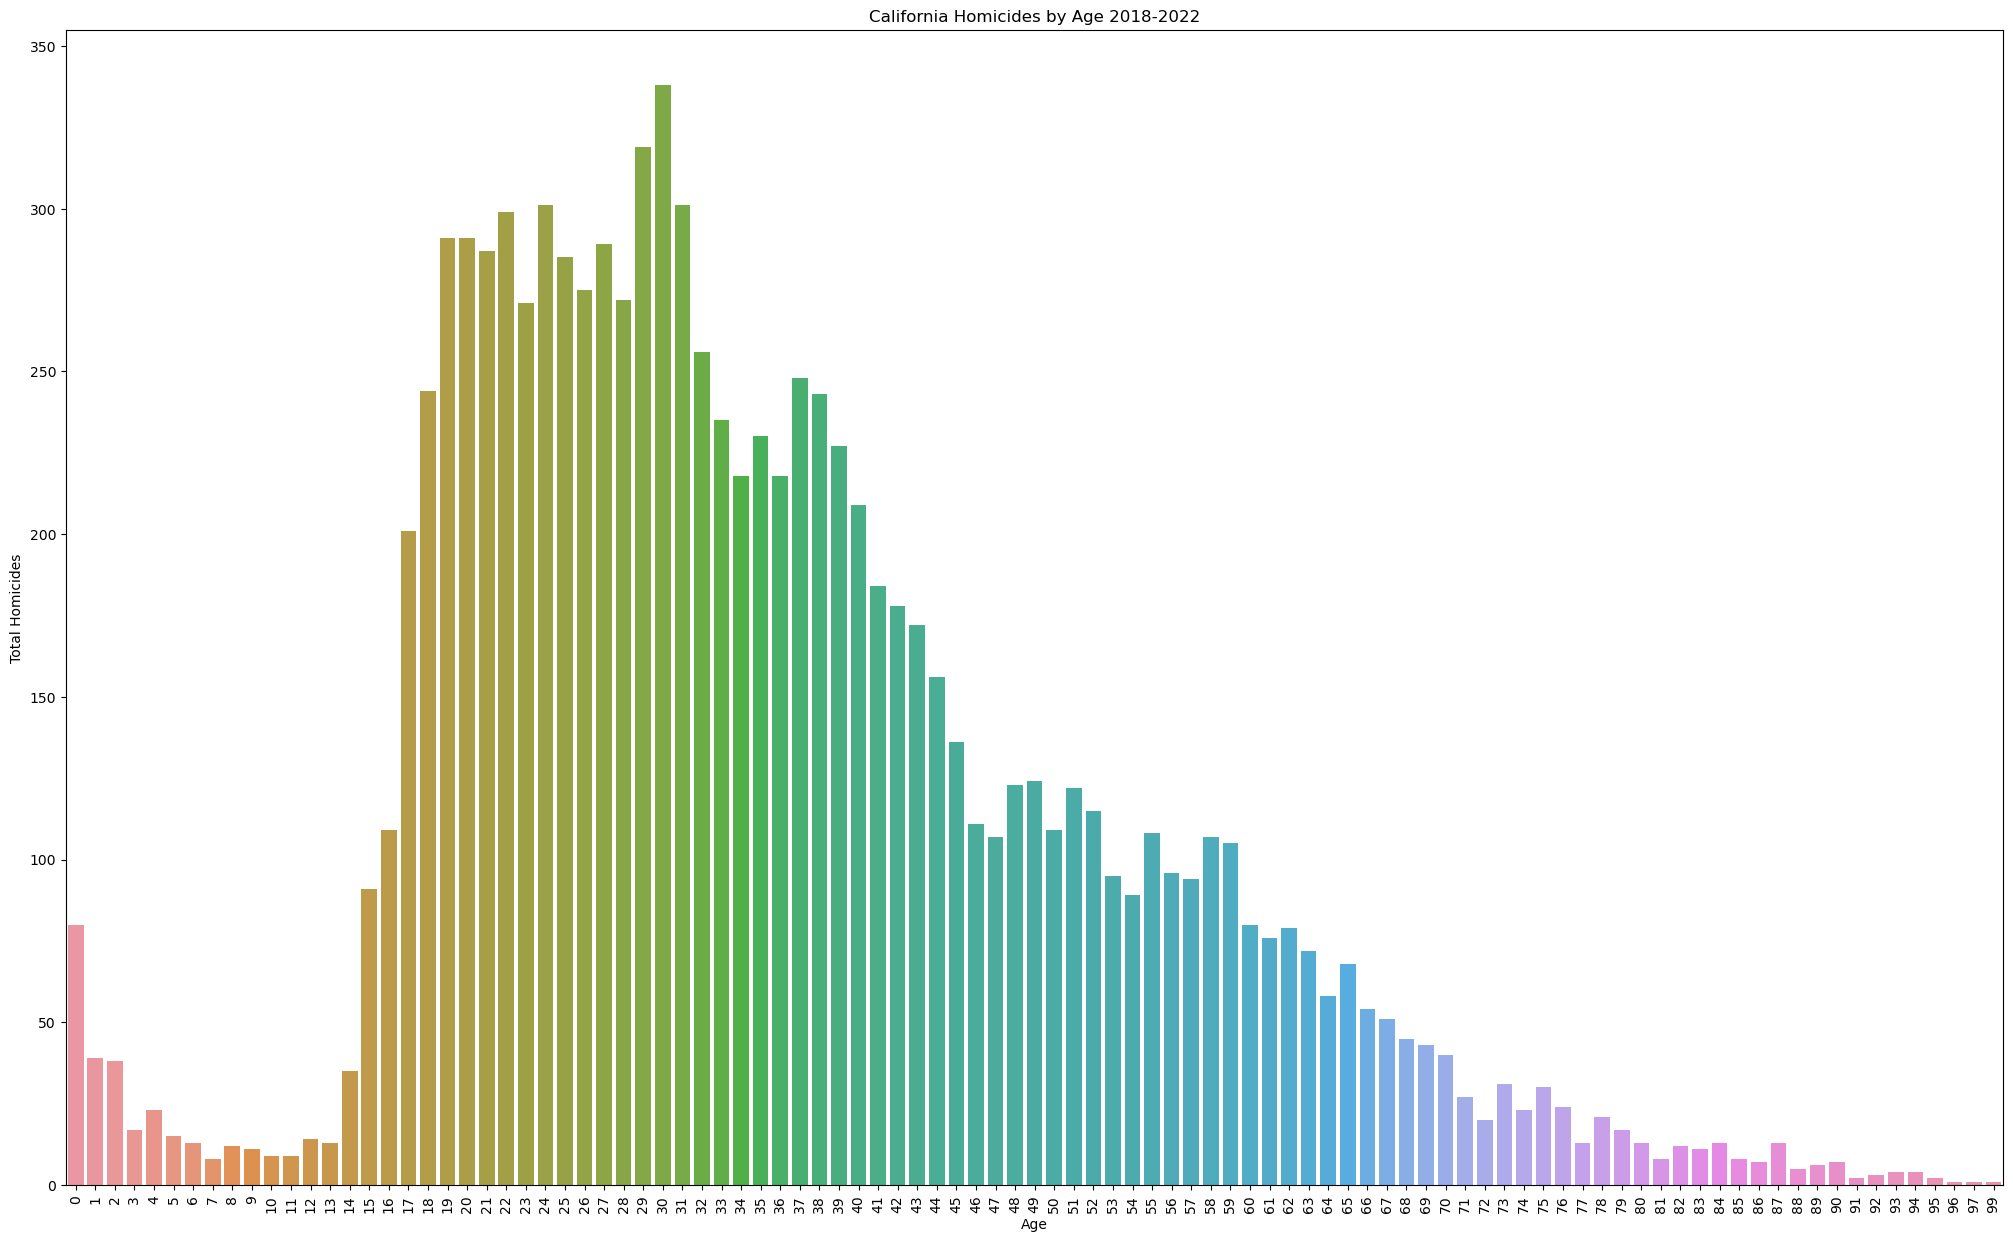

In [13]:
df4 = pd.DataFrame(columns = ['Age'])
df4["Age"]=[each for each in df3.Victim_Age.unique()]
df4["Count"]=[len(df3[df3.Victim_Age==each]) for each in df4.Age]
df4=df4.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(25,15))
sns.barplot(x=df4.Age, y=df4.Count)
plt.xticks(rotation= 90)
plt.xlabel('Age')
plt.ylabel('Total Homicides')
plt.title('California Homicides by Age 2018-2022')
plt.show()

In [14]:
df['Victim_Age'].replace('Unknown', 9999, inplace=True)
df['Victim_Age'].replace('One week to 12 months', 0, inplace=True)
df['Victim_Age'].replace('Birth to one week', 0, inplace=True)
df['Victim_Age'].replace('99 or over', 99, inplace=True)

In [15]:
df['Victim_Age'] = df['Victim_Age'].astype(int)

In [16]:
df['Victim_Age'].unique()

array([  19,   38,   34,   22,   26,   43,   23,   61,   30,   17,   49,
         41,   48,   36,   58,   44,   27,   25,   73,   62,   28,   24,
         29,   52,   57,   18,   51,   21,   40,   31,   35,   47,   46,
         50,   45,   37,   39,   59,   56,   75,   55,   70,   32,   20,
         42,   33,   66,   71,   14,   11,   16,   74,   65,   53,   60,
         15,   64,   67,   63,   80,    2,    1,   77,   68,   86,    8,
         82,   54,   69,    6,   76,   90,   12,    0,    7,   87,   81,
          4,   84,   78, 9999,   95,    5,   88,   83,   13,   85,    3,
         10,   72,   93,   89,   79,   94,    9,   97,   99,   91,   92,
         96])

In [17]:
df_age = df[df['Victim_Age'] < 100]


df_mean = list(df_age['Victim_Age'])


# #1

In [18]:


x = statistics.mean(df_mean)
print('The mean victim age is:', round(x, 2))

m = statistics.median(df_mean)

print('The median age is:', m)

md = statistics.mode(df_mean)

print('The mode age is:', md)

print('min:', min(df_mean), 'max:', max(df_mean))


The mean victim age is: 35.85
The median age is: 33.0
The mode age is: 30
min: 0 max: 99


In [19]:

#these are the top ten homicide victim ages in CA 2018-2022
top_10 = df4.head(10).reset_index(drop=True)
top_10

,Age,Count
0,30,338
1,29,319
2,24,301
3,31,301
4,22,299
5,20,291
6,19,291
7,27,289
8,21,287
9,25,285


In [20]:
bottom_10 = df4.tail(10).reset_index(drop=True)
bottom_10

,Age,Count
0,89,6
1,88,5
2,93,4
3,94,4
4,92,3
5,95,2
6,91,2
7,97,1
8,99,1
9,96,1


# Age Analysis Overview
As seen above, an initial look at the ages for victims 2018-2023 include:

    The mean victim age is: 35.85
    The median age is: 33.0
    The mode age is: 30
        The min is 0, which can include newborns to less than one year of age. While the max age is 99, which can
        include anyone 99 years of age or older.


Top 10 ages are:

    30	29	24	31	22	20	19	27	21	25

Bottom 10 ages are:	

    89	88	93	94	92	95	91	97	99	96

In [21]:
pd.set_option('display.max_colwidth', None)


In [22]:
df4 = pd.DataFrame(columns = ['Precipitating_Event'])
df4['Precipitating_Event']=[each for each in df.Precipitating_event.unique()]
df4["Count"]=[len(df[df.Precipitating_event==each]) for each in df4.Precipitating_Event]
df4=df4.sort_values(by=['Count'],ascending=False).reset_index(drop=True)


# Top 10 Precipitating events

In [23]:

top_10 = df4.head(10)
top_10

,Precipitating_Event,Count
0,All instances where facts provided do not permit determination of circumstances (skeletal remains),4066
1,Other arguments (revenge),1778
2,"Gang killing(s) (street gangs, motorcycle gangs)",1568
3,"Other not specified (kidnapping, murder for hire)",714
4,Domestic Violence (1992) (Revised June 2023),455
5,Robbery,390
6,All - suspected felony type,262
7,Drive-by Shooting (unspecified) (1996),239
8,Argument over money or property (revenge over money or property),177
9,Child abuse,146


In [24]:
bottom_10 = df4.tail(10).reset_index(drop=True)
bottom_10

,Precipitating_Event,Count
0,Burglary,29
1,"Prostitution and commercial vice (i.e., prostitute killed by pimp during argument over money)",15
2,"Other - non-felony (mercy killing, suicide pacts, mentally deranged offender)",13
3,Larceny,9
4,Motor vehicle theft,8
5,Child killed by babysitter,8
6,Rape,7
7,Gambling,6
8,"Brawl due to influence of narcotics (i.e., argument while under the influence)",5
9,"Other sex offense (sodomy, etc.)",2


In [25]:
df_prec_event = df.groupby('Precipitating_event').size().reset_index(name = 'Numbers')
df_prec_event = df_prec_event.sort_values(by=['Numbers'],ascending=True).reset_index(drop=True)

In [26]:
prec_event_min = df_prec_event[:1]
print('Least occuring precipitating event is:')
print(prec_event_min)

Least occuring precipitating event is:
                Precipitating_event  Numbers
0  Other sex offense (sodomy, etc.)        2


In [27]:
df_prec_event = df.groupby('Precipitating_event').size().reset_index(name = 'Numbers')
df_prec_event = df_prec_event.sort_values(by=['Numbers'],ascending=False).reset_index(drop=True)

In [28]:
prec_event_max = df_prec_event[:1]
print('MOST occuring precipitating event is:')
print(prec_event_max)

MOST occuring precipitating event is:
                                                                                  Precipitating_event  \
0  All instances where facts provided do not permit determination of circumstances (skeletal remains)   

   Numbers  
0     4066  


# Viewing Counties

In [29]:
df4 = pd.DataFrame(columns = ['County'])
df4['County']=[each for each in df.County.unique()]
df4["Count"]=[len(df[df.County==each]) for each in df4.County]
df4=df4.sort_values(by=['Count'],ascending=False).reset_index(drop=True)

# Top 10 Counties 

In [30]:

top_10 = df4.head(10)
top_10

,County,Count
0,Los Angeles County,3295
1,San Bernardino County,812
2,Alameda County,633
3,Riverside County,585
4,Kern County,525
5,San Diego County,505
6,Sacramento County,455
7,Fresno County,373
8,San Joaquin County,307
9,Orange County,289


# Bottom 10 Counties 

In [31]:
bottom_10 = df4.tail(10)
bottom_10

,County,Count
46,Calaveras County,6
47,Napa County,5
48,Glenn County,5
49,Mariposa County,5
50,Colusa County,4
51,Inyo County,3
52,Mono County,3
53,Lassen County,3
54,Plumas County,2
55,Modoc County,1


# Year-mo Analysis Tier 2
## This second part will gather sum incidents by year and month and create a line graph 

In [32]:
df['Month_Year'].unique()

array(['February-2018', 'March-2018', 'June-2018', 'August-2018',
       'September-2018', 'October-2018', 'December-2018', 'April-2018',
       'May-2018', 'January-2018', 'July-2018', 'November-2018',
       'February-2019', 'June-2019', 'October-2019', 'November-2019',
       'March-2019', 'May-2019', 'January-2019', 'December-2019',
       'August-2019', 'April-2019', 'July-2019', 'September-2019',
       'April-2020', 'May-2020', 'September-2020', 'July-2020',
       'November-2020', 'March-2020', 'October-2020', 'January-2020',
       'February-2020', 'August-2020', 'June-2020', 'December-2020',
       'March-2021', 'September-2021', 'July-2021', 'December-2021',
       'June-2021', 'October-2021', 'November-2021', 'January-2021',
       'May-2021', 'February-2021', 'April-2021', 'August-2021',
       'March-2022', 'May-2022', 'June-2022', 'October-2022',
       'February-2022', 'April-2022', 'July-2022', 'August-2022',
       'September-2022', 'January-2022', 'November-2022', 'D

In [33]:
df['DATE'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))
df

,Gender,Victim_Race,Victim_Age,Incident_Month,Inc_YR,Week_day,Precipitating_event,Victim_Offender_Relationship_1,date,County,Year,Month,Month_Year,DATE
0,Female,Hispanic,19,2.0,2018.0,Monday,All instances where facts provided do not permit determination of circumstances (skeletal remains),Other known to Victim,2018-02-12,Alameda County,2018,2,February-2018,2018-02-01
1,Male,Unkown,38,3.0,2018.0,Sunday,All instances where facts provided do not permit determination of circumstances (skeletal remains),Unable to determine relationship,2018-03-18,Alameda County,2018,3,March-2018,2018-03-01
2,Male,Hispanic,34,6.0,2018.0,Thursday,All instances where facts provided do not permit determination of circumstances (skeletal remains),Other known to Victim,2018-06-07,Alameda County,2018,6,June-2018,2018-06-01
3,Male,White,22,8.0,2018.0,Thursday,All instances where facts provided do not permit determination of circumstances (skeletal remains),Unable to determine relationship,2018-08-09,Alameda County,2018,8,August-2018,2018-08-01
4,Male,Hispanic,26,9.0,2018.0,Sunday,All instances where facts provided do not permit determination of circumstances (skeletal remains),Unable to determine relationship,2018-09-09,Alameda County,2018,9,September-2018,2018-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10256,Female,White,22,4.0,2021.0,Value not reported,"Other not specified (kidnapping, murder for hire)",Unable to determine relationship,2021-04-23,Mariposa County,2021,4,April-2021,2021-04-01
10257,Female,White,46,3.0,2022.0,Value not reported,All instances where facts provided do not permit determination of circumstances (skeletal remains),Unable to determine relationship,2022-03-25,Mariposa County,2022,3,March-2022,2022-03-01
10258,Male,White,44,9.0,2022.0,Value not reported,"Other not specified (kidnapping, murder for hire)",Acquaintance,2022-09-16,Lassen County,2022,9,September-2022,2022-09-01
10259,Male,White,38,2.0,2022.0,Value not reported,Narcotic drug laws (not overdose),Acquaintance,2022-02-23,Lassen County,2022,2,February-2022,2022-02-01


In [34]:


yr_mo = df[['DATE', 'Year', 'Month']].sort_values('DATE').reset_index(drop=True)


yr_mo['Count_m'] = yr_mo.groupby(['DATE']).transform('size')
yr_mo

,DATE,Year,Month,Count_m
0,2018-01-01,2018,1,167
1,2018-01-01,2018,1,167
2,2018-01-01,2018,1,167
3,2018-01-01,2018,1,167
4,2018-01-01,2018,1,167
...,...,...,...,...
10256,2022-12-01,2022,12,155
10257,2022-12-01,2022,12,155
10258,2022-12-01,2022,12,155
10259,2022-12-01,2022,12,155


In [35]:
yr_mo= yr_mo.drop_duplicates('DATE', keep='last').reset_index(drop=True)

In [36]:
yr_mo.sort_values('DATE', inplace=True)
yr_mo

,DATE,Year,Month,Count_m
0,2018-01-01,2018,1,167
1,2018-02-01,2018,2,124
2,2018-03-01,2018,3,120
3,2018-04-01,2018,4,140
4,2018-05-01,2018,5,143
5,2018-06-01,2018,6,164
6,2018-07-01,2018,7,177
7,2018-08-01,2018,8,158
8,2018-09-01,2018,9,129
9,2018-10-01,2018,10,142


In [37]:
yr_mo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     60 non-null     datetime64[ns]
 1   Year     60 non-null     int64         
 2   Month    60 non-null     int64         
 3   Count_m  60 non-null     int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 2.3 KB


# Visualization by Year-Month 

In [38]:
from matplotlib import dates as mdates



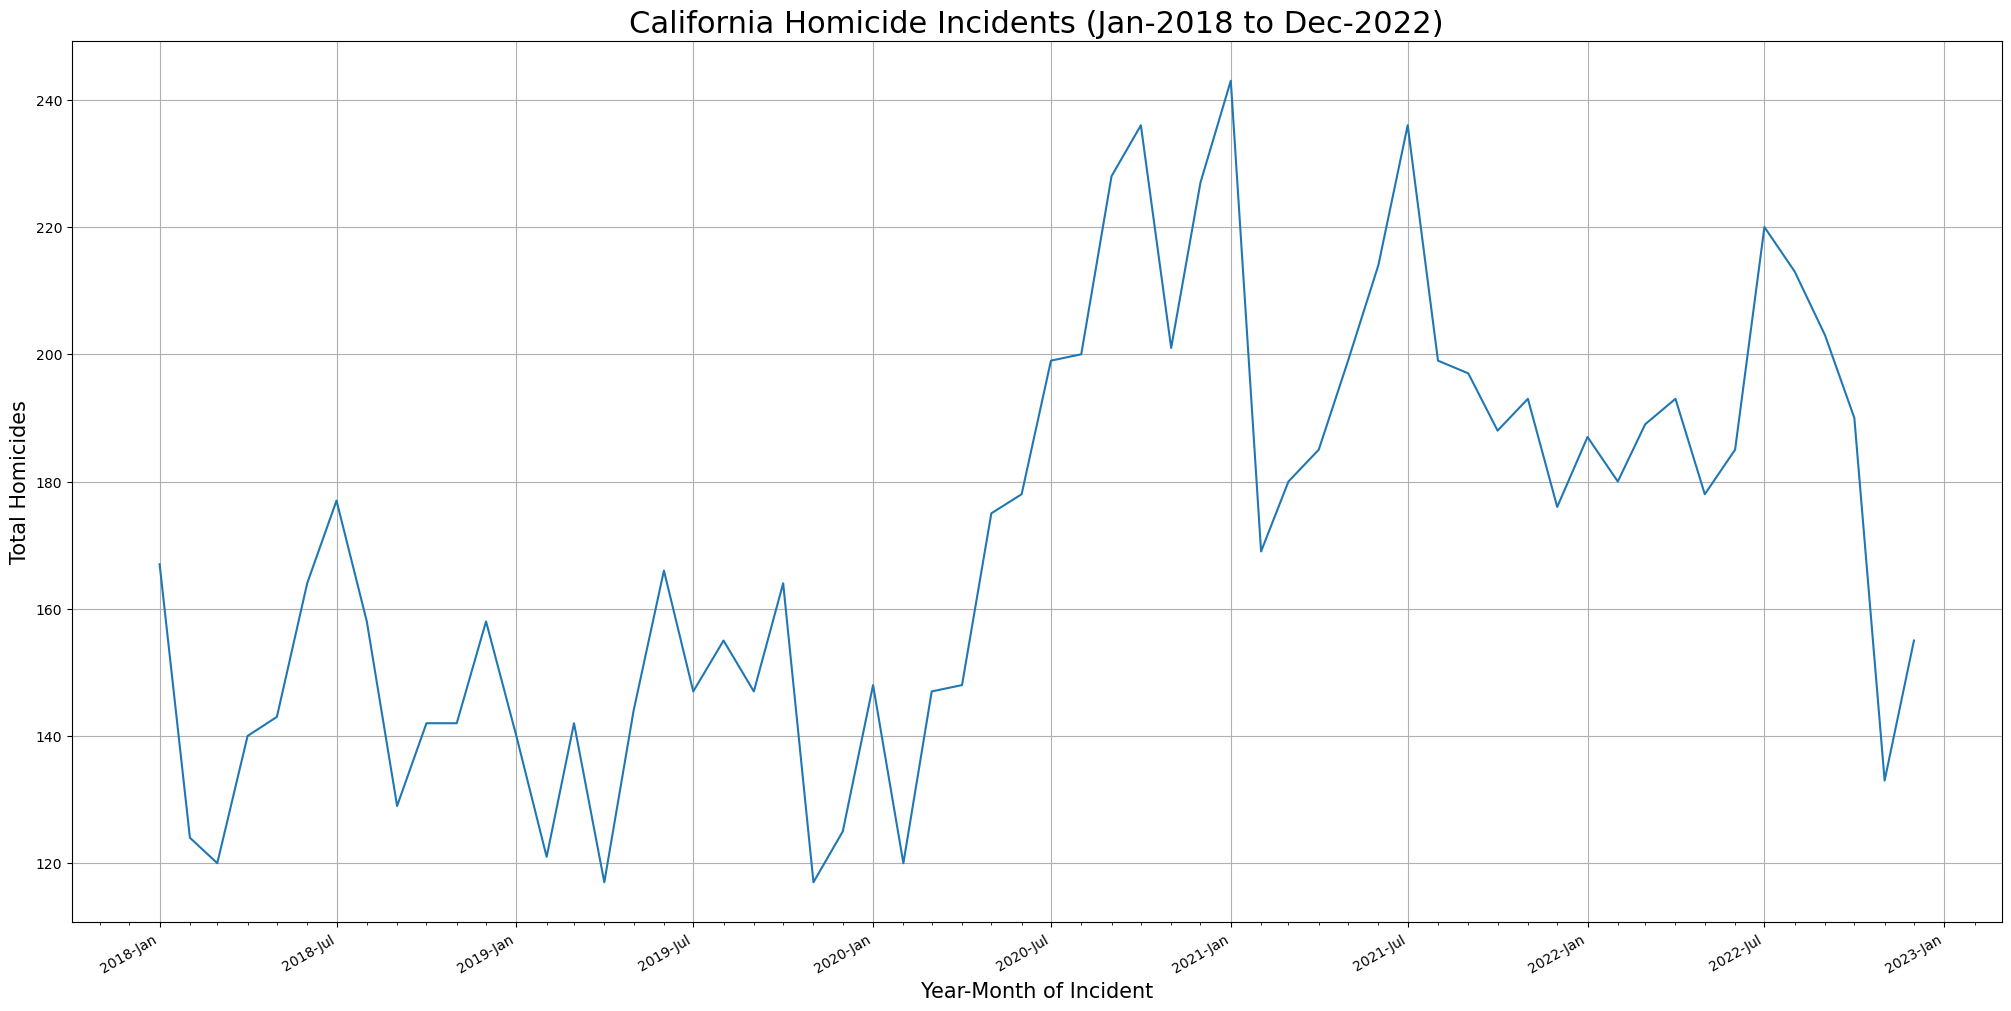

In [39]:
fig, ax = plt.subplots(figsize=(20,10), layout='constrained')
# common to all three:
line_width = 1.5

ax.plot('DATE', 'Count_m', data=yr_mo, lw=line_width)
# Major ticks every half year, minor ticks every month,
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)
ax.set_ylabel('Total Homicides', fontsize=15)
ax.set_xlabel('Year-Month of Incident', fontsize=15)

ax.set_title('California Homicide Incidents (Jan-2018 to Dec-2022)',
             fontsize=22)
# Text in the x-axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
plt.show()

## Level 2 analysis: 
homicide counts appear to have increased to higher level around April of 2020 (around the time of COVID pandemic shutdowns) up until late 2022 where they appear to be approaching pre COVID shutdown levels.

# TIER 3 Analysis:
## In this section we will take year and month sums as well, but will also group sums by precipitating event.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10261 entries, 0 to 10260
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Gender                          10261 non-null  object        
 1   Victim_Race                     10261 non-null  object        
 2   Victim_Age                      10261 non-null  int64         
 3   Incident_Month                  10261 non-null  float64       
 4   Inc_YR                          10261 non-null  float64       
 5   Week_day                        10261 non-null  object        
 6   Precipitating_event             10261 non-null  object        
 7   Victim_Offender_Relationship_1  10261 non-null  object        
 8   date                            10261 non-null  datetime64[ns]
 9   County                          10261 non-null  object        
 10  Year                            10261 non-null  int64         
 11  Mo

In [41]:
df_prec_event_date = df.groupby(['Victim_Race','Year']).size().reset_index(name = 'Numbers')
df_prec_event_date = df_prec_event_date.sort_values(by=['Year'],ascending=True).reset_index(drop=True)
df_prec_event_date

,Victim_Race,Year,Numbers
0,American Indian,2018,8
1,Hispanic,2018,801
2,Chinese,2018,6
3,Other,2018,44
4,Cambodian,2018,1
...,...,...,...
80,Cambodian,2022,3
81,Other,2022,43
82,Other Asian,2022,42
83,Unkown,2022,29


In [42]:
df_19 = df_prec_event_date[df_prec_event_date['Year']>2017]
df_19 = df_19.sort_values(by=['Numbers'],ascending=True).reset_index(drop=True)

df_19

,Victim_Race,Year,Numbers
0,Japanese,2022,1
1,Chinese,2020,1
2,Hawaiian,2022,1
3,Korean,2020,1
4,Laotian,2020,1
...,...,...,...
80,Hispanic,2019,748
81,Hispanic,2018,801
82,Hispanic,2020,1005
83,Hispanic,2022,1025


In [43]:
df_reshape = df_19.pivot(index= 'Victim_Race',columns='Year', values='Numbers')
df_reshape.fillna(0, inplace=True)

In [44]:
df_reshape

Year,2018,2019,2020,2021,2022
Victim_Race,,,,,
American Indian,8.0,5.0,9.0,9.0,6.0
Asian Indian,1.0,4.0,1.0,4.0,9.0
Black,434.0,477.0,666.0,692.0,672.0
Cambodian,1.0,2.0,4.0,0.0,3.0
Chinese,6.0,4.0,1.0,6.0,6.0
Filipino,5.0,8.0,7.0,5.0,12.0
Guamanian,0.0,0.0,1.0,2.0,2.0
Hawaiian,4.0,1.0,4.0,3.0,1.0
Hispanic,801.0,748.0,1005.0,1116.0,1025.0


# Tier 3 Analysis

## Some interesting points from the table above:
    
    

1) I notice Hispanics are have the largest homicide numbers across years 2018-2022, and it appears total incidents 
        decreased from 2018 to 2019 then made a pretty big increase from 2019 to 2020. 
2) Another interesting point worth noting is that homicide numbers are larger for Blacks compared to Whites across
    all the years 2018-2022. Based on my knowledge of California demographics, I know for a fact the White
    population in California is larger than the Black population, so although the difference in total homicides
    for Blacks vs. Whites may not appear to be too large per se, homicide rates (that is, murders per total 
    population) are surely far greater for Blacks. I'm not sure what the difference in rates would be for 
    Blacks vs. Hispanics, but it will surely be worth further examining.
3) I was surprised to see the low numbers for certain racial groups such as Korean, Japanese, Chinese, and 
    Filipino, etc. I believe this perhaps has to do with the fact that groups such as these are not lumped up 
    together with a broader group, such as "Asian", in a similar way that "Hispanics" are, for instance.
4) Overall, I noticed a common occurence across many of the racial groups is that homicide incidents increased by 
    what appears to be a large amount from 2019 to 2020, indicating that perhaps something occured during the 
    COVID-19 pandemic shutdowns that may have had to do with the increases. However, further examination
    is required to determine if that's the case. 